In [1]:
import csv
import numpy as np
import matplotlib.pyplot
import fpdf
import math
import pandas as pd
from matplotlib import rc
import matplotlib.pylab as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

> After importing all necessary libraries we should define the input .csv file that includes the financial indexes. This file is formulated from data fetched by the investing.com database and it contains the evaluation table for all criteria for each alternative.

In [2]:
inputname = "/home/elissaios/Documents/Thesis/1) MCDA/3.TOKYO/TOKYO_FINANCIAL.csv"
file =  open(inputname, "rt")
list1 = list(csv.reader(file))

> Now, list1 contains all the information of the experiment of MCDA portfolio selection. Therefore, the next step involves taking all the useful data from this list.

In [3]:
criteria = int(list1[0][1])
alternatives = int(list1[1][1])
weights = [0 for y in range(criteria)]
optimizationType = [0 for y in range(criteria)]
preferenceThreshold = [0 for y in range(criteria)]
criterion = [0 for y in range(criteria)]
indifferenceThreshold = [0 for y in range(criteria)]
criterionName = [0 for y in range(criteria)]
vetoThreshold = [0 for y in range(criteria)]
for i in range(criteria):
    optimizationType[i] = int(list1[2][i+1])
    weights[i] = float(list1[3][i+1])
    vetoThreshold[i] = float(list1[4][i+1])
    criterion[i] = int(list1[7][i+1])
    criterionName[i] = list1[9][i+1]
    preferenceThreshold[i] = float(list1[5][i+1])
    indifferenceThreshold[i] = float(list1[6][i+1])
decisionMatrix = [[0 for y in range(criteria)] for x in range(alternatives)]
companyName = ["" for i in range(alternatives)]
for i in range(alternatives):
    companyName[i] = list1[i+10][0]
    for j in range(criteria):
        decisionMatrix[i][j] = float(list1[i+10][j+1])

After importing all necessary libraries we should define the input information such as the criteria, the alternatives, the decision matrix etc.

In [4]:
criteria = 8
alternatives = 6
weights = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
optimizationType = [1, 0, 0, 1, 0, 0, 0, 0]
criterion = [5, 5, 5, 5, 5, 1, 5, 5]
vetoThreshold = [15, 15, 50, 0.8, 3, 3, 30, 30]
preferenceThreshold = [10, 10, 20, 0.4, 2, 2, 15, 15]
indifferenceThreshold = [4, 4, 8, 0.2, 1, 0, 5, 5]
criterionName = ['P/E Ratio', 'EPS', 'Revenue (B)', 'Beta', 'Dividend Yield', 'Monthly', 'YTD (%)', '1 Year']
companyName = ['Accenture', 'Northrop Grumman', 'IBM', 'Motorola', 'MSCI', 'Oracle']
decisionMatrix = [[25.05, 7.36, 43.22, 1.05, 1.74, 5, 30.37, 15.3],
                  [18.15, 20.26, 32.89, 0.8, 1.44, 5, 50.57, 21.95],
                  [11.75, 12.01, 77.86, 1.36, 4.59, 4, 24.16, 0.2],
                  [31.39, 5.45, 7.63, 0.59, 1.33, 5, 47.78,41.39],
                  [33.64, 6.62, 1.48, 1.12, 1.22, 5, 51.02, 44.54],
                  [18.17, 3, 39.53, 1.15, 1.76, 5, 22.9, 17.12]
                 ]


> In the following cell, we print the decision matrix that we have obtained as input, after transforing it to a dataframe using pandas function DataFrame as follows:

In [5]:
print("=============== Decision Matrix ===============\n")
df = pd.DataFrame.from_records(decisionMatrix, index=companyName ,columns=criterionName)
display(df)

=============== Decision Matrix ===============



,P/E Ratio,EPS,Revenue (B),Beta,Dividend Yield,Monthly,YTD (%),1 Year
Accenture,25.05,7.36,43.22,1.05,1.74,5,30.37,15.30
Northrop Grumman,18.15,20.26,32.89,0.80,1.44,5,50.57,21.95
IBM,11.75,12.01,77.86,1.36,4.59,4,24.16,0.20
Motorola,31.39,5.45,7.63,0.59,1.33,5,47.78,41.39
MSCI,33.64,6.62,1.48,1.12,1.22,5,51.02,44.54
Oracle,18.17,3.00,39.53,1.15,1.76,5,22.90,17.12


> After we have translated all the data from the .csv file that was imported, we present the source code which implements the 4 MCDA ranking methods for portfolio selection.

### MAUT

> Initially, we should calculate the normalised decision matrix:

In [6]:
maxValue = np.max(decisionMatrix, axis = 0)
minValue = np.min(decisionMatrix, axis = 0)

normalisedMatrix = [[0 for y in range(criteria)] for x in range(alternatives)]
for i in range(alternatives):
	for j in range(criteria):
		if optimizationType[j] == 0: 
			normalisedMatrix[i][j] = (decisionMatrix[i][j] - minValue[j])*1.0 / (maxValue[j] - minValue[j])
		elif optimizationType[j] == 1:
			normalisedMatrix[i][j] = (maxValue[j] - decisionMatrix[i][j])*1.0 / (maxValue[j] - minValue[j])

print("=============== Normalised decision Matrix ===============\n")
df = pd.DataFrame.from_records(normalisedMatrix, index=companyName ,columns=criterionName)
display(df)

=============== Normalised decision Matrix ===============



,P/E Ratio,EPS,Revenue (B),Beta,Dividend Yield,Monthly,YTD (%),1 Year
Accenture,0.392417,0.252607,0.546478,0.402597,0.154303,1.0,0.265647,0.340550
Northrop Grumman,0.707629,1.000000,0.411233,0.727273,0.065282,1.0,0.983997,0.490528
IBM,1.000000,0.522016,1.000000,0.000000,1.000000,0.0,0.044808,0.000000
Motorola,0.102787,0.141947,0.080518,1.000000,0.032641,1.0,0.884780,0.928958
MSCI,0.000000,0.209733,0.000000,0.311688,0.000000,1.0,1.000000,1.000000
Oracle,0.706715,0.000000,0.498167,0.272727,0.160237,1.0,0.000000,0.381597


> It is obvious that the values of the initial decision matrix have been normalised to 0-1. After the normalisation process the utility score is calculated, as follows:

In [7]:
utilityScore = [0 for x in range(alternatives)]
utilityScorePer = [0 for x in range(alternatives)]

for i in range(alternatives):
	tempSum = 0
	for j in range(criteria):
		tempSum += normalisedMatrix[i][j] * weights[j]
	utilityScore[i] = round(tempSum,4)
	utilityScorePer[i] = round(round(tempSum,4) * 100,2)

print("=============== Utility Score ===============\n")
df = pd.DataFrame(utilityScore, index=companyName, columns=["Score"])
display(df)

=============== Utility Score ===============



,Score
Accenture,0.4193
Northrop Grumman,0.6732
IBM,0.4459
Motorola,0.5215
MSCI,0.4402
Oracle,0.3774


> Finally, the results should be sorted in order to find the ranking of the method. The following shell describes this process and offers a visualisation of the results.

=============== MAUT Ranking ===============



,Company,Score
1,Northrop Grumman,67.32
2,Motorola,52.15
3,IBM,44.59
4,MSCI,44.02
5,Accenture,41.93
6,Oracle,37.74


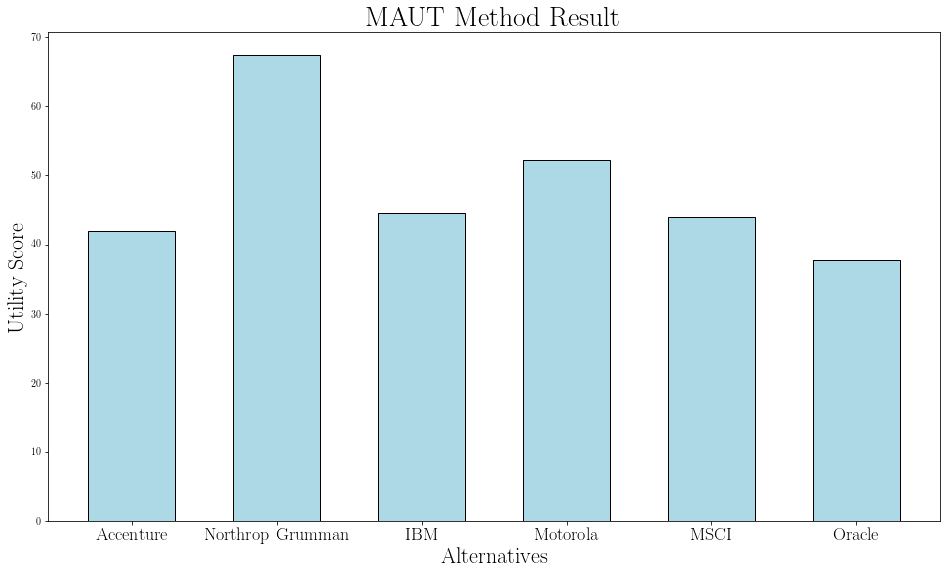

In [8]:
tupledList = list(zip(companyName,utilityScorePer))
tupledListSorted = sorted(tupledList, key=lambda tup: tup[1], reverse=True)

print("=============== MAUT Ranking ===============\n")
df = pd.DataFrame(tupledListSorted, columns=["Company", "Score"])
df.index = df.index + 1
display(df)

plt.figure(figsize=(16,9))
plt.bar(companyName, utilityScorePer, color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r" Alternatives", fontsize=22)
plt.ylabel(r"Utility Score", fontsize=22)
plt.title(r'MAUT Method Result', fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot1.png", dpi=300)

### TOPSIS

> In TOPSIS method we initially calculate the normalised decision matrix as you can see in the following cell:

In [9]:
normalisedDecisionMatrix = [[0 for i in range(criteria)] for y in range(alternatives)]
for j in range(criteria):
    sumOfPows = 0
    for i in range(alternatives):
        sumOfPows = sumOfPows + math.pow(decisionMatrix[i][j],2)
        sqSumOfPows =  math.sqrt(sumOfPows)
        for i in range(alternatives):
            normalisedDecisionMatrix[i][j] = round(decisionMatrix[i][j]*1.0 / sqSumOfPows,3)
            
print("=============== Normalised decision Matrix ===============\n")
df = pd.DataFrame.from_records(normalisedDecisionMatrix, index=companyName ,columns=criterionName)
display(df)

=============== Normalised decision Matrix ===============



,P/E Ratio,EPS,Revenue (B),Beta,Dividend Yield,Monthly,YTD (%),1 Year
Accenture,0.421,0.280,0.419,0.411,0.305,0.421,0.312,0.223
Northrop Grumman,0.305,0.771,0.319,0.313,0.252,0.421,0.520,0.320
IBM,0.197,0.457,0.755,0.533,0.805,0.337,0.248,0.003
Motorola,0.527,0.207,0.074,0.231,0.233,0.421,0.491,0.603
MSCI,0.565,0.252,0.014,0.439,0.214,0.421,0.524,0.649
Oracle,0.305,0.114,0.383,0.450,0.309,0.421,0.235,0.250


> In the following step we incorporate the offset, computing the weight decision matrix:

In [10]:
weightedDecisionMatrix = [[0 for i in range(criteria)] for y in range(alternatives)]
for j in range(criteria):
    for i in range(alternatives):
        weightedDecisionMatrix[i][j] = round(normalisedDecisionMatrix[i][j] * weights[j],3)

print("=============== Weighted decision Matrix ===============\n")
df = pd.DataFrame.from_records(weightedDecisionMatrix, index=companyName ,columns=criterionName)
display(df)

=============== Weighted decision Matrix ===============



,P/E Ratio,EPS,Revenue (B),Beta,Dividend Yield,Monthly,YTD (%),1 Year
Accenture,0.053,0.035,0.052,0.051,0.038,0.053,0.039,0.028
Northrop Grumman,0.038,0.096,0.040,0.039,0.032,0.053,0.065,0.040
IBM,0.025,0.057,0.094,0.067,0.101,0.042,0.031,0.000
Motorola,0.066,0.026,0.009,0.029,0.029,0.053,0.061,0.075
MSCI,0.071,0.032,0.002,0.055,0.027,0.053,0.066,0.081
Oracle,0.038,0.014,0.048,0.056,0.039,0.053,0.029,0.031


> Subsequently, we calculate the positive and negative ideal solutions as well as the distance of each alternative from them:

In [11]:
idealSolution = [0 for i in range(criteria)]
nonIdealSolution = [0 for i in range(criteria)]
for j in range(criteria):
    maxValue = float('-inf')
    minValue = float('inf')
    for i in range(alternatives):
        if weightedDecisionMatrix[i][j] < minValue:
            minValue = weightedDecisionMatrix[i][j]
        if weightedDecisionMatrix[i][j] > maxValue:
            maxValue = weightedDecisionMatrix[i][j]
    if optimizationType[j] == 0:
        idealSolution[j] = maxValue
        nonIdealSolution[j] = minValue
    elif optimizationType[j] == 1:
        idealSolution[j] = minValue
        nonIdealSolution[j] = maxValue

sPlus = [0 for i in range(alternatives)]
sMinus = [0 for i in range(alternatives)]
for i in range(alternatives):
    sumPlusTemp = 0
    sumMinusTemp = 0
    for j in range(criteria):
        sumPlusTemp = sumPlusTemp + math.pow(idealSolution[j]-weightedDecisionMatrix[i][j],2)
        sumMinusTemp = sumMinusTemp + math.pow(nonIdealSolution[j]-weightedDecisionMatrix[i][j],2)
    sPlus[i] = math.sqrt(sumPlusTemp)
    sMinus[i] = math.sqrt(sumMinusTemp)
    
print("=============== Positive Ideal Solution ===============\n")
df = pd.DataFrame(idealSolution, index=criterionName, columns=["Score"])
display(df)
print("\n")
print("=============== Negative Ideal Solution ===============\n")
df = pd.DataFrame(nonIdealSolution, index=criterionName, columns=["Score"])
display(df)
print("\n")
print("=============== Distance from Positive Ideal Solution ===============\n")
df = pd.DataFrame(sPlus, index=companyName, columns=["Distance"])
display(df)
print("\n")
print("=============== Distance from Negative Ideal Solution ===============\n")
df = pd.DataFrame(sMinus, index=companyName, columns=["Distance"])
display(df)

=============== Positive Ideal Solution ===============



,Score
P/E Ratio,0.025
EPS,0.096
Revenue (B),0.094
Beta,0.029
Dividend Yield,0.101
Monthly,0.053
YTD (%),0.066
1 Year,0.081




=============== Negative Ideal Solution ===============



,Score
P/E Ratio,0.071
EPS,0.014
Revenue (B),0.002
Beta,0.067
Dividend Yield,0.027
Monthly,0.042
YTD (%),0.029
1 Year,0.000




=============== Distance from Positive Ideal Solution ===============



,Distance
Accenture,0.119415
Northrop Grumman,0.098122
IBM,0.104269
Motorola,0.138025
MSCI,0.144319
Oracle,0.132102




=============== Distance from Negative Ideal Solution ===============



,Distance
Accenture,0.068169
Northrop Grumman,0.114381
IBM,0.133825
Motorola,0.091848
MSCI,0.092298
Oracle,0.067469


> Finally, we calculate the relative closeness of every alternative to the ideal solution:

In [12]:
C = [0 for i in range(alternatives)]
C2 = [0 for i in range(alternatives)]
for i in range(alternatives):
    C2[i] = round(round(sMinus[i]*1.0 / (sMinus[i] + sPlus[i]),4) * 100,2) #percentage
    C[i] = sMinus[i]*1.0 / (sMinus[i] + sPlus[i])
    
print("=============== Relative Closeness ===============\n")
df = pd.DataFrame(C, index=companyName, columns=["Distance"])
display(df)

=============== Relative Closeness ===============



,Distance
Accenture,0.363404
Northrop Grumman,0.538255
IBM,0.562067
Motorola,0.399558
MSCI,0.390074
Oracle,0.338068


> The final ranking of TOPSIS method is provided if we sort the relative closeness. In the following cell we describe this procedure as well the visualisation of the results.

=============== TOPSIS Ranking ===============



,Company,Score
1,IBM,0.562067
2,Northrop Grumman,0.538255
3,Motorola,0.399558
4,MSCI,0.390074
5,Accenture,0.363404
6,Oracle,0.338068


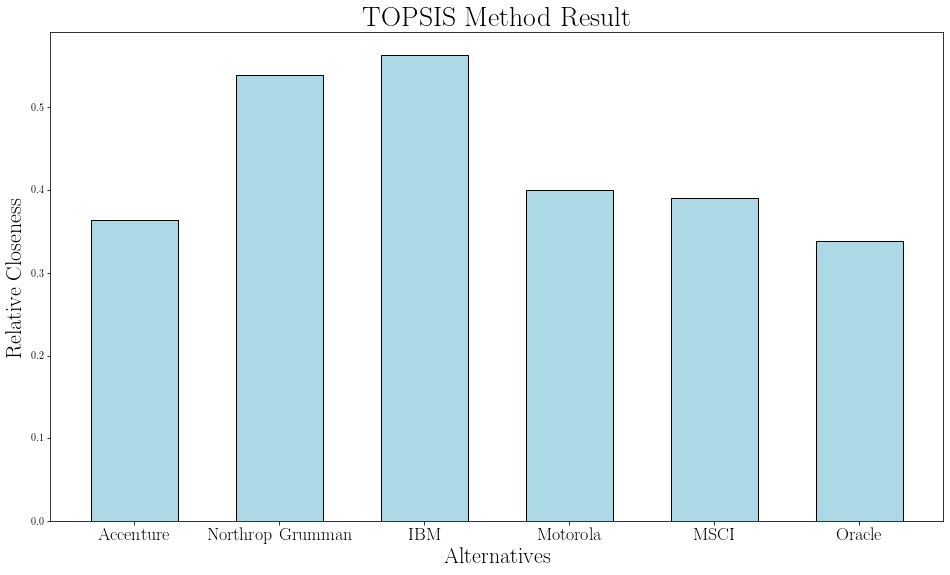

In [13]:
tupledList = list(zip(companyName,C))
tupledListSorted = sorted(tupledList, key=lambda tup: tup[1], reverse=True)

print("=============== TOPSIS Ranking ===============\n")
df = pd.DataFrame(tupledListSorted, columns=["Company", "Score"])
df.index = df.index + 1
display(df)

plt.figure(figsize=(16,9))
plt.bar(companyName, C, color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r" Alternatives", fontsize=22)
plt.ylabel(r"Relative Closeness", fontsize=22)
plt.title(r'TOPSIS Method Result', fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot2.png", dpi=300)

### ELECTRE III

> ELECTRE III belongs to the ELECTRE family methods which are based on a different concept than the previous ones. This method is based on pairwise comparisons between the alternatives. Firstly, we calculate the agreement and the disagreement tables:

In [14]:
sumOfWeights = sum(weights)
agreementTable = [[0 for i in range(alternatives)] for y in range(alternatives)]
for k in range(criteria):
    if optimizationType[k] == 0:
        for i in range(alternatives):
            for j in range(alternatives):
                if i!=j:
                    if decisionMatrix[j][k] - decisionMatrix[i][k] <= indifferenceThreshold[k]:
                        agreementTable[i][j] = round(agreementTable[i][j] + 1.0 * weights[k],2)
                    elif decisionMatrix[j][k] - decisionMatrix[i][k] <= preferenceThreshold[k]:
                        agreementTable[i][j] = round(agreementTable[i][j] + ((decisionMatrix[i][k] - decisionMatrix [j][k] + preferenceThreshold[k])*1.0 / (preferenceThreshold[k]-indifferenceThreshold[k])) * weights[k],2)
                    else:
                        agreementTable[i][j] = round(agreementTable[i][j] + 0.0 * weights[k],2)
    elif optimizationType[k] == 1:
        for i in range(alternatives):
            for j in range(alternatives):
                if i!=j:
                    if decisionMatrix[i][k] - decisionMatrix[j][k] <= indifferenceThreshold[k]:
                        agreementTable[i][j] = round(agreementTable[i][j] + 1.0 * weights[k],2)
                    elif decisionMatrix[i][k] - decisionMatrix[j][k] <= preferenceThreshold[k]:
                        agreementTable[i][j] = round(agreementTable[i][j] + ((decisionMatrix[j][k] - decisionMatrix [i][k] + preferenceThreshold[k])*1.0 / (preferenceThreshold[k]-indifferenceThreshold[k])) * weights[k],2)
                    else:
                        agreementTable[i][j] = round(agreementTable[i][j] + 0.0 * weights[k],2)

disagreementTable = [[[0 for k in range(criteria)] for i in range(alternatives)] for j in range(alternatives)] 
for k in range(criteria):
    if optimizationType[k] == 0:
        for i in range(alternatives):
            for j in range(alternatives):
                if i!=j:
                    if decisionMatrix[j][k] - decisionMatrix[i][k] <= preferenceThreshold[k]:
                        disagreementTable[i][j][k] = 0
                    elif decisionMatrix[j][k] - decisionMatrix[i][k] <= vetoThreshold[k]:
                        disagreementTable[i][j][k] = round(((decisionMatrix[j][k] - decisionMatrix [i][k] - preferenceThreshold[k])*1.0 / (vetoThreshold[k]-preferenceThreshold[k])),2)
                    else:
                        disagreementTable[i][j][k] = 1
    elif optimizationType[k] == 1:
        for i in range(alternatives):
            for j in range(alternatives):
                if i!=j:
                    if decisionMatrix[i][k] - decisionMatrix[j][k] <= indifferenceThreshold[k]:
                        disagreementTable[i][j][k] = 0
                    elif decisionMatrix[i][k] - decisionMatrix[j][k] <= vetoThreshold[k]:
                        disagreementTable[i][j][k] = round(((decisionMatrix[j][k] - decisionMatrix [i][k] + preferenceThreshold[k])*1.0 / (vetoThreshold[k]-preferenceThreshold[k])),2)
                    else:
                        disagreementTable[i][j][k] = 1

> In the following step we are able to calculate the reliability and dominance tables based on the above tables:

In [15]:
reliabilityTable = [[0 for i in range(alternatives)] for y in range(alternatives)]
for i in range(alternatives):
    for j in range(alternatives):
        if i!=j:
            reliabilityTable[i][j] = agreementTable[i][j]
            for k in range(criteria):
                if agreementTable[i][j] < disagreementTable[i][j][k]:
                    reliabilityTable[i][j] = round(reliabilityTable[i][j] * ((1 - disagreementTable[i][j][k]) / (1 - agreementTable[i][j])), 2)

d = 0.8
dominanceTable = [[0 for i in range(alternatives)] for y in range(alternatives)]
for i in range(alternatives):
    for j in range(alternatives):
        if i!=j and reliabilityTable[i][j] >= d:
            dominanceTable[i][j] = 1

>Finally, the proposed version of ELECTRE III suggests the calculation of the positive and negative flow for each alternative. Based on these two, we can compute the final ELECTRE III flow, as described in the following cell: 

In [16]:
phiPlus = [round(sum(x),6) for x in reliabilityTable ]
phiMinus = [round(sum(x),6) for x in zip(*reliabilityTable)]
phiEl = [round(x1 - x2,6) for (x1, x2) in zip(phiPlus, phiMinus)]

print("=============== Positive Flow ===============\n")
df = pd.DataFrame(phiPlus, index=companyName, columns=["Flow"])
display(df)
print("\n")
print("=============== Negative Flow ===============\n")
df = pd.DataFrame(phiMinus, index=companyName, columns=["Flow"])
display(df)
print("\n")
print("=============== ELECTRE III Flow ===============\n")
df = pd.DataFrame(phiEl, index=companyName, columns=["Flow"])
display(df)

=============== Positive Flow ===============



,Flow
Accenture,2.31
Northrop Grumman,3.59
IBM,1.71
Motorola,2.56
MSCI,1.63
Oracle,1.77




=============== Negative Flow ===============



,Flow
Accenture,4.21
Northrop Grumman,0.90
IBM,0.37
Motorola,2.55
MSCI,2.13
Oracle,3.41




=============== ELECTRE III Flow ===============



,Flow
Accenture,-1.90
Northrop Grumman,2.69
IBM,1.34
Motorola,0.01
MSCI,-0.50
Oracle,-1.64


> The final ranking of ELECTRE III method is provided if we sort the ELECTRE III flows. In the following cell we describe this procedure as well the visualisation of the results:

=============== ELECTRE III Ranking ===============



,Company,Score
1,Northrop Grumman,2.69
2,IBM,1.34
3,Motorola,0.01
4,MSCI,-0.50
5,Oracle,-1.64
6,Accenture,-1.90


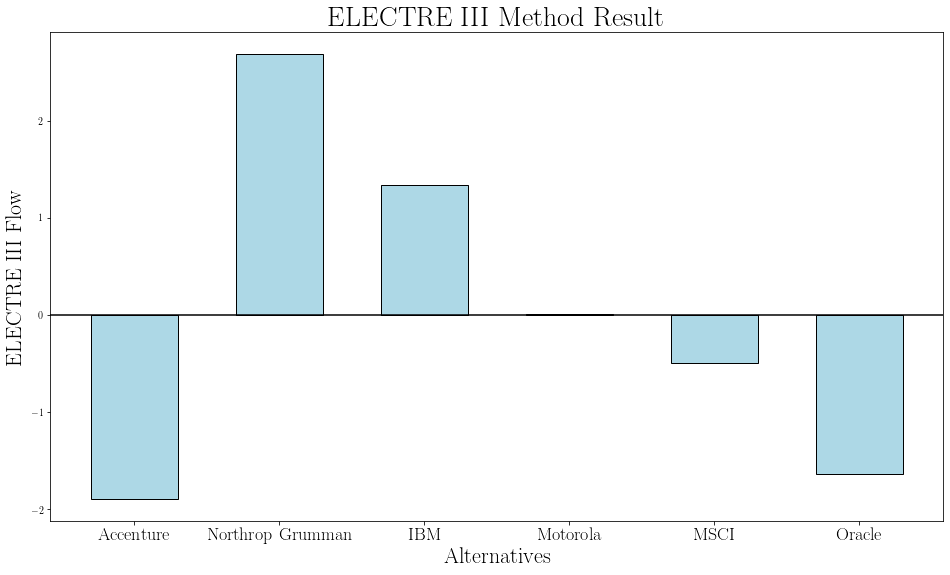

In [17]:
tupledList = list(zip(companyName,phiEl))
tupledListSorted = sorted(tupledList, key=lambda tup: tup[1], reverse=True)

print("=============== ELECTRE III Ranking ===============\n")
df = pd.DataFrame(tupledListSorted, columns=["Company", "Score"])
df.index = df.index + 1
display(df)

plt.figure(figsize=(16,9))
plt.bar(companyName, phiEl, color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r" Alternatives", fontsize=22)
plt.ylabel(r"ELECTRE III Flow", fontsize=22)
plt.title(r"ELECTRE III Method Result", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
matplotlib.pyplot.axhline(0, c="k")
plt.savefig("barplot3.png", dpi=300)

### PROMETHEE II

> Finally, the PROMETHEE method is also based on pairwise comparisons of the alternatives. IT differs from ELECTRE III because it gives the opportunity to customise the comparison function based on the decision-maker's profile. Therefore, we must begin the presentation of this method with the different functions for pairwise comparisons. 

In [18]:
def usualCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType):
    for i in range(alternatives):
        for j in range(alternatives):
            if i!=j and decisionMatrix[i][k] >= decisionMatrix[j][k]:
                if decisionMatrix[i][k] > decisionMatrix[j][k]:
                    evaluationTable[i][j] = evaluationTable[i][j] + 1.0 * weights[k]

def quasiCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType):
    for i in range(alternatives):
        for j in range(alternatives):
            if i!=j and decisionMatrix[i][k] >= decisionMatrix[j][k]:
                if decisionMatrix[i][k] - decisionMatrix[j][k] > indifferenceThreshold[k]:
                    evaluationTable[i][j] = evaluationTable[i][j] + 1.0 * weights[k]

def linearPreferenceCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType):
    for i in range(alternatives):
        for j in range(alternatives):
            if i!=j and decisionMatrix[i][k] >= decisionMatrix[j][k]:
                if decisionMatrix[i][k] - decisionMatrix[j][k] > preferenceThreshold[k]:
                    evaluationTable[i][j] = evaluationTable[i][j] + 1.0 * weights[k]
                else:
                    evaluationTable[i][j] = evaluationTable[i][j] + ((decisionMatrix[i][k] - decisionMatrix [j][k])*1.0 / preferenceThreshold[k]) * weights[k]

def levelCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType):
    for i in range(alternatives):
        for j in range(alternatives):
            if i!=j and decisionMatrix[i][k] >= decisionMatrix[j][k]:
                if decisionMatrix[i][k] - decisionMatrix[j][k] > preferenceThreshold[k]:
                    evaluationTable[i][j] = evaluationTable[i][j] + 1.0 * weights[k]
                elif decisionMatrix[i][k] - decisionMatrix[j][k] <= indifferenceThreshold[k]:
                    evaluationTable[i][j] = evaluationTable[i][j] + 0.0 * weights[k]
                else:
                    evaluationTable[i][j] = evaluationTable[i][j] + 0.5 * weights[k]

def linearPreferenceAndIndifferenceCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType):
    if optimizationType[k] == 0:
        for i in range(alternatives):
            for j in range(alternatives):
                if i!=j and decisionMatrix[i][k] >= decisionMatrix[j][k]:
                    if decisionMatrix[i][k] - decisionMatrix[j][k] > preferenceThreshold[k]:
                        evaluationTable[i][j] = evaluationTable[i][j] + 1.0 * weights[k]
                    elif decisionMatrix[i][k] - decisionMatrix[j][k] > indifferenceThreshold[k]:
                        evaluationTable[i][j] = evaluationTable[i][j] + ((decisionMatrix[i][k] - decisionMatrix [j][k] - indifferenceThreshold[k])*1.0 / (preferenceThreshold[k]-indifferenceThreshold[k])) * weights[k]
                    else:
                        evaluationTable[i][j] = evaluationTable[i][j] + 0.0 * weights[k]
    elif optimizationType[k] == 1:
        for i in range(alternatives):
            for j in range(alternatives):
                if i!=j and decisionMatrix[i][k] >= decisionMatrix[j][k]:
                    if decisionMatrix[i][k] - decisionMatrix[j][k] > preferenceThreshold[k]:
                        evaluationTable[j][i] = evaluationTable[j][i] + 1.0 * weights[k]
                    elif decisionMatrix[i][k] - decisionMatrix[j][k] > indifferenceThreshold[k]:
                        evaluationTable[j][i] = evaluationTable[j][i] + ((decisionMatrix[i][k] - decisionMatrix [j][k] - indifferenceThreshold[k])*1.0 / (preferenceThreshold[k]-indifferenceThreshold[k])) * weights[k]
                    else:
                        evaluationTable[j][i] = evaluationTable[j][i] + 0.0 * weights[k]

>After the definition of the necessary functions we can calculate the evaluation table between all the alternatives. The criterion used must be defined by the user in the .csv file:

In [19]:
evaluationTable = [[0.0 for i in range(alternatives)] for y in range(alternatives)]

for k in range(criteria):
    if criterion[k] == 1:
        usualCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType)
    elif criterion[k] == 2:
        quasiCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType)
    elif criterion[k] == 3:
        linearPreferenceCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType)
    elif criterion[k] == 4:
        levelCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType)
    elif criterion[k] == 5:
        linearPreferenceAndIndifferenceCriterion(evaluationTable, k, alternatives, decisionMatrix, indifferenceThreshold, preferenceThreshold, weights, optimizationType)


> After the calculation of the evaluation table, we can compute the positive and negative flows just like in ELECTRE III method. The net flow of PROMETHEE method is the difference between these two flows:

In [20]:
sumOfLines = np.sum(evaluationTable, axis=1)
sumOfColumns = np.sum(evaluationTable, axis=0)

phiPlus = sumOfLines*1.0 / (alternatives - 1)
phiMinus = sumOfColumns*1.0 / (alternatives - 1)
phi = phiPlus - phiMinus
phi2 = phiPlus - phiMinus

for i in range(alternatives):
    phi2[i] = round(round(phi[i],4) * 100,2)

print("=============== Positive Flow ===============\n")
df = pd.DataFrame(phiPlus, index=companyName, columns=["Flow"])
display(df)
print("\n")
print("=============== Negative Flow ===============\n")
df = pd.DataFrame(phiMinus, index=companyName, columns=["Flow"])
display(df)
print("\n")
print("=============== PROMETHEE Net Flow ===============\n")
df = pd.DataFrame(phi, index=companyName, columns=["Flow"])
display(df)

=============== Positive Flow ===============



,Flow
Accenture,0.158179
Northrop Grumman,0.423917
IBM,0.385125
Motorola,0.301250
MSCI,0.205000
Oracle,0.163250




=============== Negative Flow ===============



,Flow
Accenture,0.287167
Northrop Grumman,0.116104
IBM,0.415733
Motorola,0.245417
MSCI,0.289917
Oracle,0.282383




=============== PROMETHEE Net Flow ===============



,Flow
Accenture,-0.128988
Northrop Grumman,0.307813
IBM,-0.030608
Motorola,0.055833
MSCI,-0.084917
Oracle,-0.119133


> The final ranking of PROMETHEE II method is provided if we sort the net flows. In the following cell we describe this procedure as well the visualisation of the results:

=============== PROMETHEE II Ranking ===============



,Company,Score
1,Northrop Grumman,2.69
2,IBM,1.34
3,Motorola,0.01
4,MSCI,-0.50
5,Oracle,-1.64
6,Accenture,-1.90


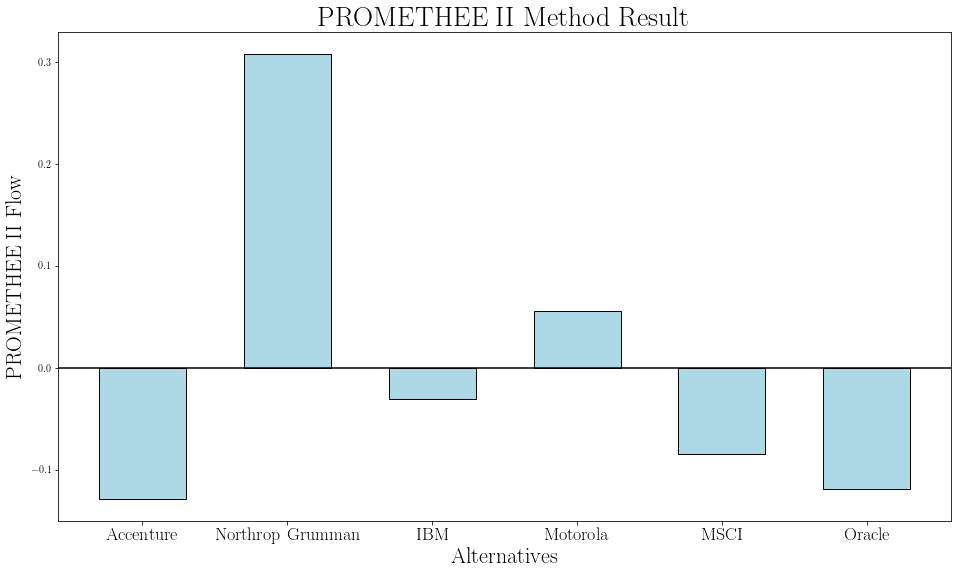

In [21]:
tupledList = list(zip(companyName,phiEl))
tupledListSorted = sorted(tupledList, key=lambda tup: tup[1], reverse=True)

print("=============== PROMETHEE II Ranking ===============\n")
df = pd.DataFrame(tupledListSorted, columns=["Company", "Score"])
df.index = df.index + 1
display(df)

plt.figure(figsize=(16,9))
plt.bar(companyName, phi, color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Alternatives", fontsize=22)
plt.ylabel(r"PROMETHEE II Flow", fontsize=22)
plt.title(r"PROMETHEE II Method Result", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
matplotlib.pyplot.axhline(0, c="k")
plt.savefig("barplot4.png", dpi=300)

### Cumulative Ranking

> The final ranking is the weighted sum of the rankings of the four MCDA methods. Therefore, in the following cell we describe the calculation of the cumulative score of each alternative as well as the final ranking and a visualisation of the results.

1    Northrop Grumman
2                 IBM
3            Motorola
4                MSCI
0           Accenture
5              Oracle
Name: Name, dtype: object

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


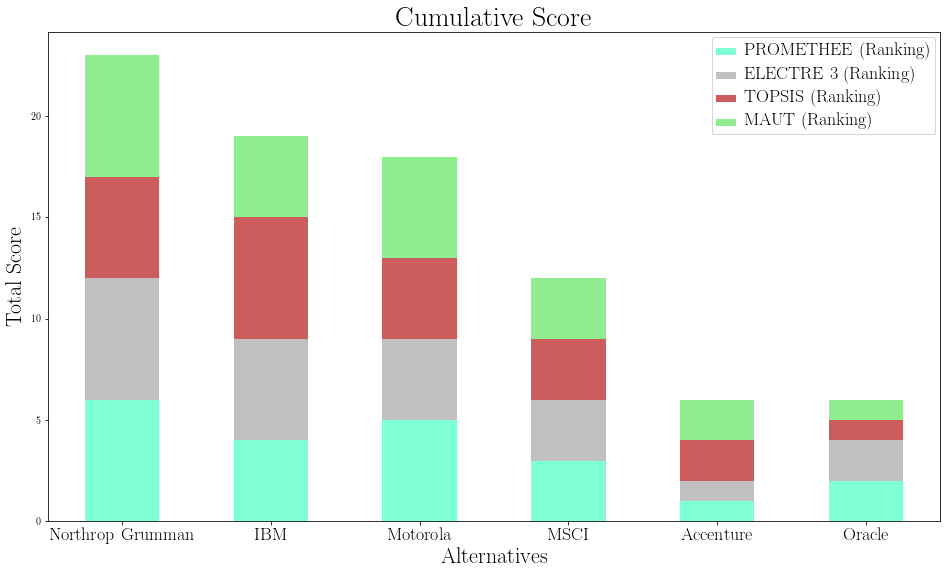

In [22]:
decisionMatrix = np.array(decisionMatrix)
data = {'Name':companyName, 'P/E Ratio':decisionMatrix[:,0],'EPS':decisionMatrix[:,1],'Revenue (B)':decisionMatrix[:,2],
	    'Beta':decisionMatrix[:,3],'Dividend Yield':decisionMatrix[:,4],'Monthly':decisionMatrix[:,5],'YTD':decisionMatrix[:,6],
	    '1Year':decisionMatrix[:,7], 'ELECTRE 3':phiEl, 'MAUT':utilityScorePer, 'PROMETHEE':phi, 'TOPSIS':C2} 

df = pd.DataFrame(data) 
df["ELECTRE 3 (Ranking)"] = df["ELECTRE 3"].rank() 
df["MAUT (Ranking)"] = df["MAUT"].rank() 
df["PROMETHEE (Ranking)"] = df["PROMETHEE"].rank() 
df["TOPSIS (Ranking)"] = df["TOPSIS"].rank() 
df["RankSum"] = df.iloc[:,13:17].sum(axis=1)
df.sort_values("RankSum", inplace=True, ascending=False) 
# display(df)
display(df['Name'].iloc[:20])

# plt.figure(figsize=(16,9))
ax = df.iloc[:50].plot(x ='Name', 
		y={'ELECTRE 3 (Ranking)','MAUT (Ranking)','TOPSIS (Ranking)','PROMETHEE (Ranking)'}, 
	    color={'lightgreen','silver','aquamarine','indianred'}, 
	    kind = 'bar', 
	    figsize=(16, 9), 
	    stacked=True, 
	    rot=0)
# ax.tick_params(axis='x', colors='white', length=10, labelsize='xx-large')
# ax.tick_params(axis='y', colors='white')
legend = plt.legend()
plt.setp(legend.get_texts(), color='black', size='18')
plt.xlabel(r"Alternatives", fontsize=22)
plt.ylabel(r"Total Score", fontsize=22)
plt.title(r"Cumulative Score", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
# matplotlib.pyplot.axhline(0, c="k")
plt.savefig("barplot5.png", dpi=300)


In [23]:
data = {'Name':companyName, 'ELECTRE 3':phiEl, 'MAUT':utilityScorePer, 'PROMETHEE':phi2, 'TOPSIS':C2} 

df = pd.DataFrame(data) 
df.index = df.index + 1

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)
# print(df.to_latex(index=False))

,Name,ELECTRE 3,MAUT,PROMETHEE,TOPSIS
1,Accenture,-1.90,41.93,-12.90,36.34
2,Northrop Grumman,2.69,67.32,30.78,53.83
3,IBM,1.34,44.59,-3.06,56.21
4,Motorola,0.01,52.15,5.58,39.96
5,MSCI,-0.50,44.02,-8.49,39.01
6,Oracle,-1.64,37.74,-11.91,33.81
